<a href="https://colab.research.google.com/github/Flor-Si/Trabajos/blob/main/%5BRESUELTO%5D_Notebook_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programa Ingenias+ Data Science

## ✏️ Ejercitación: Aprendizaje No Supervisado

Esta notebook les permitiria ejercitar los conceptos de aprendizaje automatico no supervisado que hemos aprendimos.

En este caso, vamos a trabajar con el dataset que usamos anteriormente relativos a [clientes de un centro comercial](https://www.kaggle.com/akram24/mall-customers) y que luego de procesar, guardamos oportunamente.

El objetivo de este projecto es ajustar modelos de aprendizaje no supervisado. Luego, realicen la evaluación de los modelos y decidan porque elegirian uno sobre el otro.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
clientes = pd.read_csv('clientes_limpio.csv')

In [ ]:
clientes.head()

,Age,anual_income,spending_score,male,female
0,19.0,15.0,39.0,0,1
1,21.0,15.0,81.0,1,0
2,20.0,16.0,6.0,1,0
3,23.0,16.0,77.0,1,0
4,31.0,17.0,40.0,1,0


### 🚀 👩🏽‍💻 Aprendizaje No Supervisado 📣

### Clustering: Kmeans 🧩

Si aún no lo hicieron, pueden realizar una exploración de los datos para poder visualizar la distribución de las variables y la correlación entre ellas.

Esto es porque para poder aplicar K-means, los datos deben cumplir ciertos requerimientos:

- **Forma de los clusters**: La varianza de la distribución es esferica. Lo que significa que los clusters tienen una forma esferica. Lo que significa que si las variables tienen varianzas similares y siguen una distribución normal, es más factible que este supuesto se cumpla.
- **Tamaño de los clusters**: Todos los clusters deben tener el mismo numero (o muy similar) de observaciones
- **Relación entre las variables**: Existe poca o ninguna correlación entre las variables.

#### Crea tres modelos usando k=2, k=6, k=9

In [ ]:
X = np.array(clientes)

**1. k=2**

In [ ]:
# Especificamos el numero adecuado de clusters en cada caso
kmeans_dos = KMeans(n_clusters=2, random_state=0)

In [ ]:
kmeans_dos.fit(X);

In [ ]:
centroids_1 = kmeans_dos.cluster_centers_
etiquetas_1 = kmeans_dos.labels_

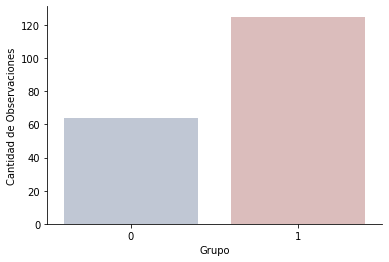

In [ ]:
y_means = kmeans_dos.fit_predict(X)
sns.countplot(y_means, palette='vlag')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Observaciones')
sns.despine()

- Recordemos el orden de las columnas:
    - `Age`
    - `anual_income`
    - `spending_score`
    - `male`
    - `female`
    
Para graficar utilizaremos dos de cualquiera de las tres primeras columnas.

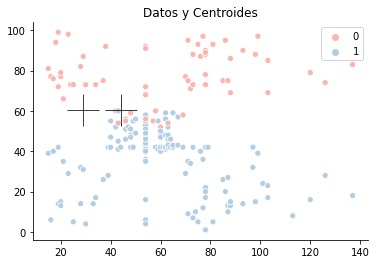

In [ ]:
# Graficando los datos
sns.scatterplot(X[:, 1], X[:, 2], hue = etiquetas_1, palette='Pastel1')
sns.scatterplot(centroids_1[:, 0], centroids_1[:, 1], color='black', marker="+", s=1000)
plt.title('Datos y Centroides')
sns.despine()
plt.show()

**2. k=6**

In [ ]:
kmeans_seis = KMeans(n_clusters=6, random_state=0)

In [ ]:
kmeans_seis.fit(X);

In [ ]:
centroids_2 = kmeans_seis.cluster_centers_
etiquetas_2 = kmeans_seis.labels_

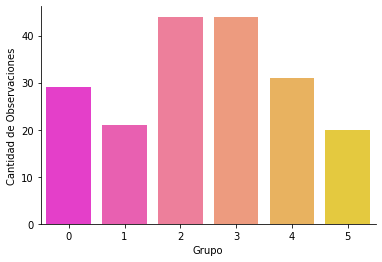

In [ ]:
y_means_2 = kmeans_seis.fit_predict(X)
sns.countplot(y_means_2, palette='spring')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Observaciones')
sns.despine()

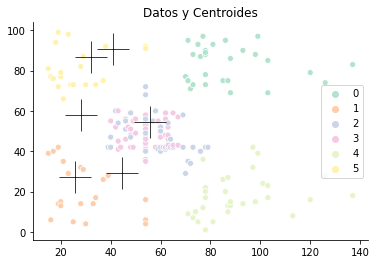

In [ ]:
# Graficando los datos
sns.scatterplot(X[:, 1], X[:, 2], hue = etiquetas_2, palette='Pastel2')
sns.scatterplot(centroids_2[:, 0], centroids_2[:, 1], color='black', marker="+", s=1000)
plt.title('Datos y Centroides')
sns.despine()
plt.show()

**3. k=9**

In [ ]:
kmeans_nueve = KMeans(n_clusters=9, random_state=0)

In [ ]:
kmeans_nueve.fit(X);

In [ ]:
centroids_3 = kmeans_nueve.cluster_centers_
etiquetas_3 = kmeans_nueve.labels_

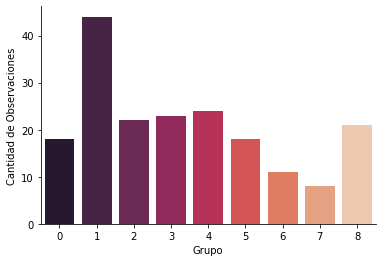

In [ ]:
y_means_3 = kmeans_nueve.fit_predict(X)
sns.countplot(y_means_3, palette='rocket')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Observaciones')
sns.despine()

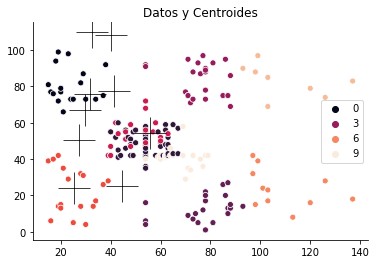

In [ ]:
# Graficando los datos
sns.scatterplot(X[:, 1], X[:, 2], hue = etiquetas_3, palette='rocket')
sns.scatterplot(centroids_3[:, 0], centroids_3[:, 1], color='black', marker="+", s=1000)
plt.title('Datos y Centroides')
sns.despine()
plt.show()

¿Crees que el resultado es satisfactorio?

#### Metodos para elegir K

Aplica los métodos que conoces y elige el k que mejor se ajusta a los datos.

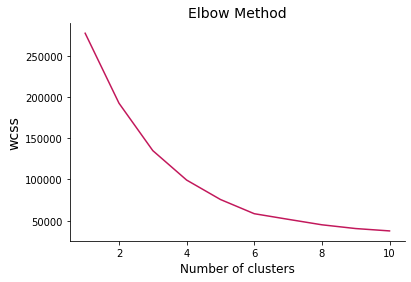

In [ ]:
#Graficamos para obtener el codo
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(clientes)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss, c="#C2185B")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Elbow Method', size=14)
plt.xlabel('Number of clusters', size=12)
plt.ylabel('wcss', size=14)
plt.show()

#### Ajusta el modelo usando el K seleccionado

In [ ]:
# Kmeans algorithm
# n_clusters: Numero of clusters. En nuestro caso vamos a elegir 5
# init: k-means++. Inicializacion de los centroides de manera inteligente
# max_iter: Maximo numero de iteraciones
# n_init: Numero de veces que k-means correra con diferentes inicializacion de centroides.
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=10, n_init=10, random_state=42)

# Fit y predict
y_means_final = kmeans.fit_predict(X)

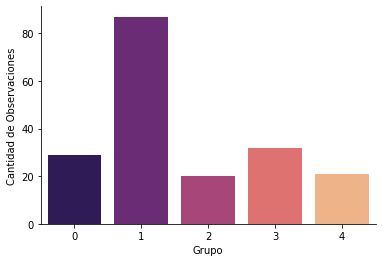

In [ ]:
sns.countplot(y_means_final, palette='magma')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Observaciones')
sns.despine()

#### Gráfica el resultado

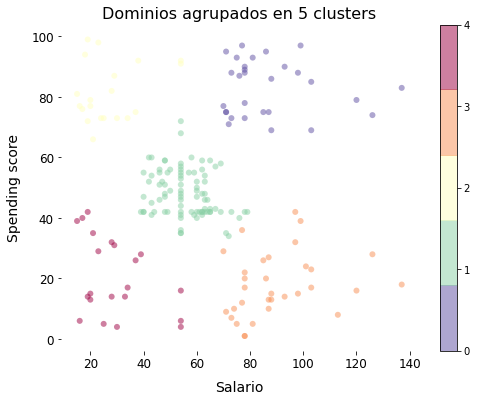

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))

plt.scatter(X[:, 1], X[:, 2],
            c=y_means_final,
            edgecolor="none",
            cmap=plt.cm.get_cmap("Spectral_r", 5),
            alpha=0.5)

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)

plt.xticks(size=12)
plt.yticks(size=12)

plt.xlabel("Salario", size = 14, labelpad=10)
plt.ylabel("Spending score", size = 14, labelpad=10)

plt.title('Dominios agrupados en 5 clusters', size=16)


plt.colorbar(ticks=[0, 1, 2, 3, 4]);

plt.show()

Podemos ahora describir un cliente promedio de cada uno de los clusters determinados.

In [ ]:
centroids = pd.DataFrame(kmeans.cluster_centers_,
                         columns = ["Age", "annual_income", "spending_score", "male", "female"])

In [ ]:
centroids["grupo"] = centroids.index
centroids = centroids.reset_index(drop=True)

In [ ]:
centroids

,Age,annual_income,spending_score,male,female,grupo
0,32.275862,86.655172,83.000000,0.517241,0.482759,0
1,42.206897,55.942529,48.206897,0.609195,0.390805,1
2,25.700000,27.050000,81.500000,0.650000,0.350000,2
3,40.281250,90.093750,17.937500,0.468750,0.531250,3
4,44.714286,29.285714,20.476190,0.714286,0.285714,4


Podemos imaginar un nuevo cliente `X_new` y asignarle valores a las variables consideradas, y ver a qué cluster pertenece.

In [ ]:
X_new = np.array([[43, 61, 56, 0, 1]])

new_customer = kmeans.predict(X_new)
print(f"El nuevo cliente pertenece al segmento {new_customer[0]}")

El nuevo cliente pertenece al segmento 1
